This notebook explores the random phase initial conditions in the bi-periodic domain. It can also be used to generate random phase forcing.

In [9]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy


import numpy as np
import time as tme
from numpy import *
from numpy import fft
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

Define transforms, grid and wavenumbers for Fourier-SinCos basis:

In [11]:
#
# FFT in X, SINE FFT in Z (sine transform)
#
def FFT_FST(N1,N2,F):
    F_hat = complex(0.,0.)*np.zeros((N1,N2))
    #
    #   Sine Transform first
    #
    for l in range(N1):
        F_hat[l,1:N2-1] = fftpack.dst(F[l,1:N2-1],type=1)/(np.float_(N2)-1.)
    #
    #  Then Fourier Transform
    #
    for q in range(N2):
        F_hat[:,q] = np.fft.fft(F_hat[:,q])
    #
    #  No normalization in this configuration
    #
    return F_hat

def iFFT_FST(N1,N2,F_hat):
    F = np.zeros((N1,N2))
    for k in range(N2):
        F[:,k] = np.fft.ifft(F_hat[:,k]).real
    #
    #   The F's are reals once we take the ifft, but they have complex parts that won't work
    #   with the sine transform, so we set them all real
    #
    #    F = real(F)

    #
    # Now that you have Reals take the inverse sine transform
    #
    for l in range(N1):
        F[l,1:N2-1] = fftpack.idst(F[l,1:N2-1],type=1)*.5
    #
    # Normalize for the inverse cosine transform
    #
    #    F = F/2./N2

    return F

[    0.            31.41592654    62.83185307    94.24777961
   125.66370614   157.07963268   188.49555922   219.91148575
   251.32741229   282.74333882   314.15926536   345.57519189
   376.99111843   408.40704497   439.8229715    471.23889804
   502.65482457   534.07075111   565.48667765   596.90260418
   628.31853072   659.73445725   691.15038379   722.56631033
   753.98223686   785.3981634    816.81408993   848.23001647
   879.64594301   911.06186954   942.47779608   973.89372261
  1005.30964915  1036.72557568  1068.14150222  1099.55742876
  1130.97335529  1162.38928183  1193.80520836  1225.2211349
 -1256.63706144 -1225.2211349  -1193.80520836 -1162.38928183
 -1130.97335529 -1099.55742876 -1068.14150222 -1036.72557568
 -1005.30964915  -973.89372261  -942.47779608  -911.06186954
  -879.64594301  -848.23001647  -816.81408993  -785.3981634
  -753.98223686  -722.56631033  -691.15038379  -659.73445725
  -628.31853072  -596.90260418  -565.48667765  -534.07075111
  -502.65482457  -471.2388

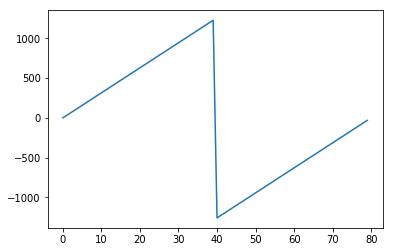

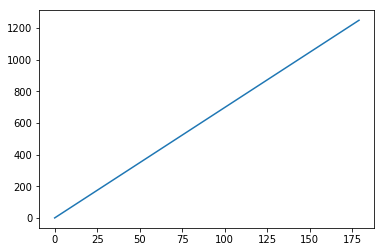

39.0


In [12]:
Nx = 80
Nz = 180
factor = 1
#factor = 2
#factor = 4
#factor = 10
Nx = Nx*factor
Nz = Nz*factor

#
# Here's the domain
#

Lx = 0.2
Lz = 0.45

#
# Here's the grid and the wave numbers
#

dx = float(Lx)/Nx
dz = float(Lz)/(Nz-1)

x = np.arange(Nx)*dx
z = np.arange(Nz)*dz
xv,zv = np.meshgrid(x,z)
#print(x)
#print(z)
#print(xv)

kkx       = np.fft.fftfreq(np.int_(Nx),Lx/Nx)*2.*np.pi
kkz       = np.arange(np.int_(Nz))*np.pi/Lz
#kkz       = np.fft.fftfreq(np.int_(Nz),Lz/Nz)*2.*np.pi
print(kkx)
plt.figure()
plt.plot(kkx)
plt.figure()
plt.plot(kkz)
plt.show()

kkxv,kkzv = np.meshgrid(kkx,kkz)

print(max(kkx/2./np.pi*Lx))


In the next few cells I explore making even and odd functions out of random functions in case I want to use them for initialization later. For example, the fourier series itself must be composed of even /and/ odd functions, while the fourier sine series absolutly must be odd and periodic. Not only that it must have zero on the end points (but I don't do that in this notebook).  In this notebook we will let the fourier transform do the symmetrization of the random initial condition, however, so we may not need this for this process.

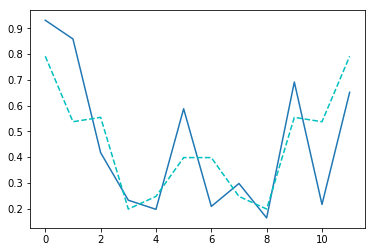

t_even:  [0.79143714 0.53718738 0.55419776 0.19798462 0.247098   0.39787391
 0.39787391 0.247098   0.19798462 0.55419776 0.53718738 0.79143714]


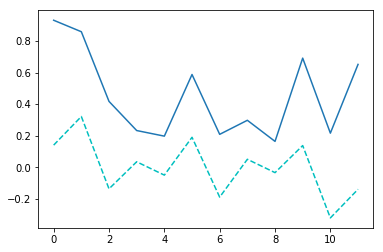

t_odd:  [ 0.1399174   0.32134954 -0.13711493  0.03440374 -0.05020415  0.18959375
 -0.18959375  0.05020415 -0.03440374  0.13711493 -0.32134954 -0.1399174 ]


In [4]:
#
# Test making an odd function about the z axis. We want to do this so that we can construct
# a random phase function that has the symmetry imposed by the fourier sine series
#
Nt = 12
t_array = np.random.rand(Nt)
#print(t_array)
plt.plot(t_array, 'r-')
#
# Make an even array about the midpoint of Nz
#
t_array_flip = np.flip(t_array,0)
plt.plot(t_array_flip,'b-')
plt.show()
t_even = (t_array+t_array_flip)/2.
plt.plot(t_array)
plt.plot(t_even,'c--')
plt.show()
print('t_even: ', t_even)
#
# Make an odd array about the midpoint of Nz
#
t_odd = (t_array - t_array_flip)/2.
plt.plot(t_array)
plt.plot(t_odd,'c--')
plt.show()
print('t_odd: ', t_odd)

t_array shape:  (6, 12)


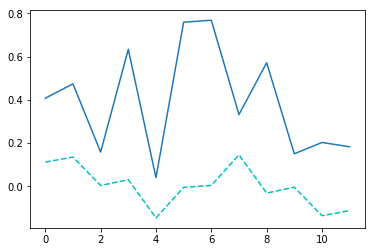

t_odd[3,:] [ 0.11218142  0.13544512  0.00391582  0.03096855 -0.14575034 -0.00451649
  0.00451649  0.14575034 -0.03096855 -0.00391582 -0.13544512 -0.11218142]


In [5]:
#
# Test making an odd function about the z axis for a 2D array like we have
Ntx = 6
Ntz = 12
t_array = np.random.rand(Ntx, Ntz)
print('t_array shape: ', t_array.shape)
#print(t_array)
plt.plot(t_array[3,:], 'r-')
plt.plot(t_array[:,5], 'y-')
plt.show()
#
# Make an odd array about the midpoint of Nz
#
t_array_flipz = np.flip(t_array,1)
t_odd = (t_array - t_array_flipz)/2.
plt.plot(t_array[3,:])
plt.plot(t_odd[3,:],'c--')
plt.show()
print("t_odd[3,:]", t_odd[3,:])

In [6]:
#plt.contourf(t_array)
#plt.show()
#plt.contourf(t_odd)
#plt.show()

#2d flip - even
Ntx = 8
Ntz = 18
t_array = np.random.rand(Ntx, Ntz)
t_array_flipx = np.flip(t_array,0)
t_even_x = (t_array + t_array_flipx)/2.
plt.plot(t_array[:,6])
plt.plot(t_array_flipx[:,6])
plt.plot(t_even_x[:,6],'c--')
print("t_even_x[:,6]: ", t_even_x[:,6])
print(" ")

plt.figure()
t_even_x_flipz = np.flip(t_even_x,1)
t_even_odd = (t_even_x - t_even_x_flipz)/2.
plt.plot(t_even_x[3,:])
plt.plot(t_even_x_flipz[3,:])
plt.plot(t_even_odd[3,:],'c--')
print("t_even_odd[3,:]: ", t_even_odd[3,:])

plt.figure()
plt.contourf(t_even_odd)
plt.show()

t_even_x[:,6]:  [0.6510165  0.82252313 0.77758152 0.75202233 0.75202233 0.77758152
 0.82252313 0.6510165 ]
 
t_even_odd[3,:]:  [-0.0138454   0.00720259  0.0518642  -0.01789901  0.06771735 -0.02582619
  0.18843942 -0.09919489 -0.03716861  0.03716861  0.09919489 -0.18843942
  0.02582619 -0.06771735  0.01789901 -0.0518642  -0.00720259  0.0138454 ]


Here we define the parameters to be used for the target shape of the potential energy spectra.

In [7]:
kx_0  = 6                   # The x wave number were the energy should be focused
kz_0  = 14                  # The z wave number were the energy should be focused
m    = 25                   # A parmamter of the problem



In [8]:
print(kx_0,kz_0,m)

6 14 25


In [9]:
def BigPEK(kx, kz, Lx, Lz, kx_0, kz_0, m):
    """This is the type of function that is typically used to define amplitudes 
    for random phase initial conditions. For our periodic lab tests we cannot sensibly
    use a 'circle' in wave number space to compute an effective radius as we need to be
    able to have higher wave numbers in the vertical than in the horizontal. Therefore we
    define a two-d output.
    
    ikx = the x wave number (horizontal)
    ikz = the z wave number (vertical)
    
    kx_0 is the horizontal wave number where we'd like the energy to peak
    kz_0 is the vertical wave number where we'd like the energy to peak
    
    """
    ikx = np.sqrt(kx*kx/4./np.pi/np.pi*Lx*Lx)
    ikz = kz/np.pi*Lz
    return (ikx**(m/2.)/(ikx+kx_0)**m )* (ikz**(m/2.)/(ikz+kz_0)**m)

In [10]:
PE2DTarget = np.zeros((Nx,Nz))

In [11]:
ikx_count = 0
for ikx in kkx:
    iikx = np.sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
    #iikx = int(ikx/2./np.pi*Lx)
    ikz_count = 0
    for ikz in kkz:
        iikz = int(ikz/np.pi*Lz)
        PE2DTarget[ikx_count, ikz_count] = BigPEK(ikx, ikz, Lx, Lz, kx_0, kz_0, m)
        ikz_count += 1
    ikx_count += 1


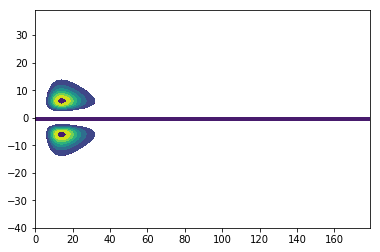

In [12]:
plt.contourf(kkz/np.pi*Lz,kkx/2./np.pi*Lx,PE2DTarget) # We want this to be low wave numbers in x and z

The following two cells define the arrays we will use for the buoyancy and its spectral coefficients.

In [13]:
rhoHat = np.zeros((np.int_(Nx),np.int_(Nz)), dtype='complex128')


In [14]:
rho = np.zeros((np.int_(Nx),np.int_(Nz)), dtype='complex128')


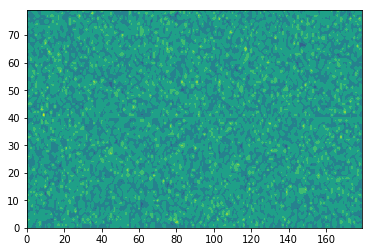

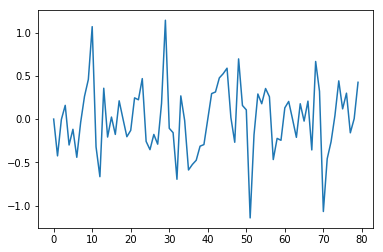

In [15]:

#rho_rand = np.random.rand(Nx,Nz)     # Assign the density randomly but assign it a new variable
rho = np.random.uniform(low=-1,high=1,size=(Nx,Nz))
#
#  Now make this odd in z if you want
#
#rho_flipz = np.flip(rho_rand,1)
#rho = (rho_rand - rho_flipz)

rhoHat = FFT_FST(Nx,Nz,rho)         # Compute its FFT to find the spectral coefficients -- which should be noisy}
plt.contourf(rhoHat.real)
plt.figure()
plt.contourf(rhoHat.imag)
plt.show()

plt.figure()
plt.plot(rhoHat.real[:,int(Nz/2.)])
plt.show()
plt.figure()
plt.plot(rhoHat.imag[:,int(Nz/2.)])
plt.show()


In [16]:
def PeCentroid(rhohat, kkx, kkz):
    """This function computes the 'centroid' of the potential energy. It is the wave numbers
       at which the PE is centered.
    """
    pe_top = 0
    pe_bot = 0
    ikx_count = 0
    for ikx in kkx:
        iikx = np.sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
        #iikx = int(ikx/2./np.pi*Lx)
        ikz_count = 0
        for ikz in kkz:
            iikz = int(ikz/np.pi*Lz)
            xwj = np.sqrt(iikx*iikx + iikz*iikz)
            pe_top = pe_top + xwj*rhohat[ikx_count, ikz_count]*rhohat[ikx_count, ikz_count].conj() 
            pe_bot = pe_bot + rhohat[ikx_count, ikz_count]*rhohat[ikx_count, ikz_count].conj()
            ikz_count += 1
        ikx_count += 1
    print (rhohat[40,0],rhohat[40,Nz-1])
    #print(rhohat[:,80])
    return pe_top.real/pe_bot.real


In [17]:
# This cell makes a contour plot of the real part of the density
plt.contourf(rho.real)
plt.colorbar()
plt.show()

In [18]:
print('Centroid of original data is at wave number: ',PeCentroid(rhoHat, kkx, kkz))

0j 0j
Centroid of original data is at wave number:  94.05018871738497


Compute the PE energy for each vertical and horizontal wave number

In [19]:
PEkshape = np.zeros((Nx,Nz), dtype = 'float')
ikx_count = 0
for ikx in kkx:
    ikz_count = 0
    for ikz in kkz:
        xw = sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx + ikz*ikz/np.pi/np.pi*Lz*Lz)
        energyValue = .5*xw*xw*rhoHat[ikx_count, ikz_count]*rhoHat[ikx_count, ikz_count].conj()
        PEkshape[ikx_count, ikz_count] = energyValue.real
        ikz_count += 1
    ikx_count += 1


In [20]:
PEarray = np.zeros((Nx,Nz))
ikx_count = 0
for ikx in kkx:
    ikz_count = 0
    for ikz in kkz:
        xw = sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
        zw = ikz/np.pi*Lz
        ixw = int(xw)
        #print(ikx_count, xw, ikz_count, zw)
        energyValue = .5*xw*zw*rhoHat[ikx_count, ikz_count]*rhoHat[ikx_count, ikz_count].conj()
        PEarray[ikx_count, ikz_count] = energyValue.real
        ikz_count += 1
    ikx_count += 1


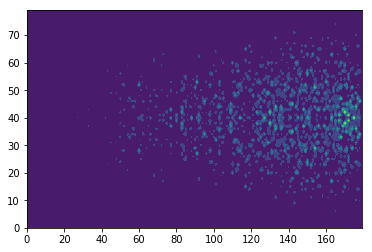

In [21]:
plt.contourf(PEarray)

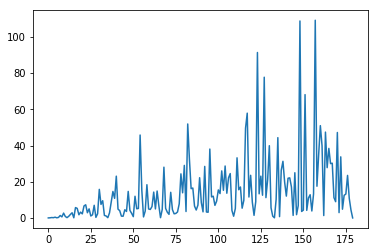

In [22]:
fig = plt.figure()
plt.plot(kkz/np.pi*Lz,PEarray[1,:])
plt.show()

1.8651598979220205


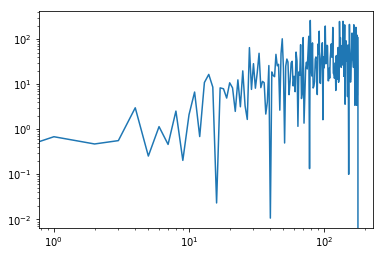

In [23]:

# Here we plot the potential energy as a function of the shell wave number. 
# We can see there is lots of noise  in the high wave numbers

print(PEarray[4,4])
plt.loglog(PEarray[3,:])
plt.show()

Below, renormalize the pe spectrum, so that it has a shape where the amplitudes (PE energy) have a shape that varies more slowly. This is the shape is also plotted up below.

In [24]:
BigPEkTarget = np.zeros((Nx,Nz))
BigPEk = np.zeros((Nx,Nz), dtype = 'float')
ixwSet = np.zeros(int(max(Nx,Nz)))
ikx_count = 0
for ikx in kkx:
    iikx = np.sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
    #iikx = int(ikx/2./np.pi*Lx)
    ikz_count = 0
    for ikz in kkz:
        iikz = int(ikz/np.pi*Lz)
        xwj = np.sqrt(iikx*iikx + iikz*iikz)
        xw = np.sqrt(ikx*ikx + ikz*ikz)
        ixw = int(np.sqrt(iikx*iikx + iikz*iikz))
#        ixw = int(round(np.sqrt(iikx*iikx + iiky*iiky),0))
        absrhoHat = rhoHat[ikx_count, ikz_count]*rhoHat[ikx_count, ikz_count].conj()
        BigPEk[ikx_count, ikz_count] = BigPEk[ikx_count,ikz_count] + .5*xw*xw*absrhoHat.real
        #print(ikx_count, ikz_count, iikx, iikz, m, kx_0, kz_0)
        BigPEkTarget[ikx_count,ikz_count] = (iikx**(m/2)/(iikx+kx_0)**m)*(iikz**(m/2)/(iikz+kz_0)**m)
        ikz_count += 1
        #print(iikx, iikz, xwj, ixw)
    ikx_count += 1
    
    
    
    
#
# Renormalize BigETarget so that we see what the actual shape of potential energy is when it is
# binned according to the shell wave number, ix
#
BigPEkTarget = BigPEkTarget/max(np.reshape(BigPEkTarget, -1))
BigPEk = BigPEk/max(np.reshape(BigPEk,-1))
print(max(np.reshape(BigPEkTarget,-1)))
print(max(np.reshape(BigPEk,-1)))
#for i in range(Nx):
#    print (BigEk[i])

1.0
1.0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


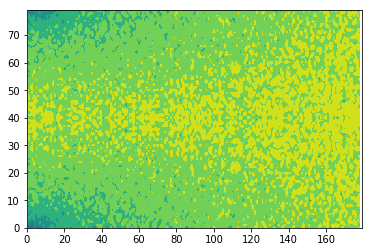

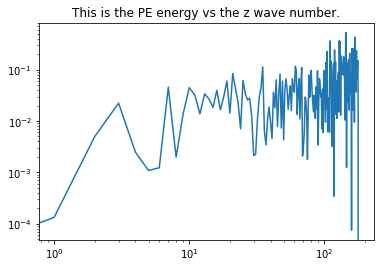

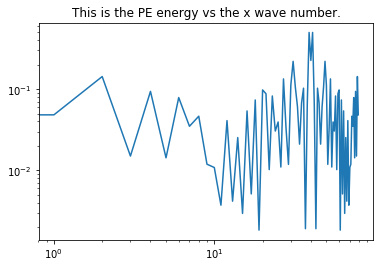

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


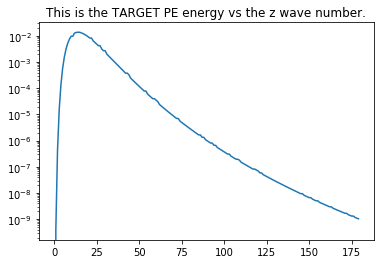

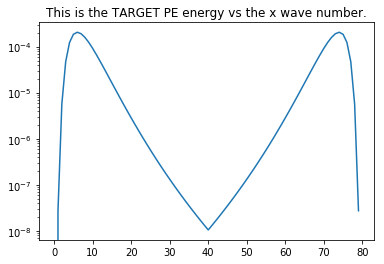

In [25]:
logBigPEk = np.log(BigPEk)
plt.contourf(logBigPEk)
plt.show()
plt.loglog(BigPEk[20,:])
plt.title('This is the PE energy vs the z wave number.')
plt.show()
plt.loglog(BigPEk[:,80])
plt.title('This is the PE energy vs the x wave number.')
plt.show()

logBigPEkTarget = np.log(BigPEkTarget)
plt.contourf(logBigPEkTarget)
plt.title('Here is our target distribution')
plt.show()

plt.semilogy(BigPEkTarget[20,:])
plt.title('This is the TARGET PE energy vs the z wave number.')
plt.show()

plt.semilogy(BigPEkTarget[:,80])
plt.title('This is the TARGET PE energy vs the x wave number.')
plt.show()


#BigRatio = BigPEkTarget/BigPEk
#plt.plot(BigRatio)
#plt.title('The ratio of the target over the actual vs wave number')
#plt.show()

In the above figures, we can see that it is the low wave numbers that really need to be modified. Next! We renormalize the amplitudes of the original random initial condition so the amplitdues are slowly varrying.

So, renormalize.

* First loop over every wave number. Find out which 'shell' belong to each wave number and then divide the spectral coefficient by the max energy in that shell.
* Next multiply it by the target energy. 



In [26]:
rhoHatNew = np.copy(rhoHat)
ikx_count = 0
for ikx in kkx:
    ikz_count = 0
    iikx = np.sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
    #iikx = int(ikx/2./np.pi*Lx)
    for ikz in kkz:
        iikz = int(ikz/np.pi*Lz)
        xwj = np.sqrt(iikx*iikx + iikz*iikz)
        xw = np.sqrt(ikx*ikx + ikz*ikz)
        ixw = int(np.sqrt(iikx*iikx + iikz*iikz))
        if iikz > 0 and iikx > 0 and ikz_count < Nz-1:
            rhoHatNew[ikx_count, ikz_count] = rhoHat[ikx_count,ikz_count]/BigPEk[ikx_count, ikz_count] 
            rhoHatNew[ikx_count, ikz_count] = rhoHatNew[ikx_count, ikz_count]*BigPEkTarget[ikx_count, ikz_count]
        else:
            rhoHatNew[ikx_count, ikz_count] = 0.
        ikz_count += 1
    ikx_count += 1
        

In [27]:
print(rhoHatNew[0,14],rhoHat[0,14],BigPEk[14,14],BigPEkTarget[14,14])

0j (0.45665888389926534+0j) 0.00574533822698484 0.11310741468888155


Now that we have brand new, renormalized spectral coefficients, compute the new PEk! This should have a more smoothly varying shape.

In [28]:
BigPEkNew = np.zeros((Nx,Nz), dtype = 'float')
ikx_count = 0
for ikx in kkx:
    #iikx = int(ikx/2./np.pi*Lx)
    iikx = np.sqrt(ikx*ikx/4./np.pi/np.pi*Lx*Lx)
    ikz_count = 0
    for iky in kkz:
        iikz = int(ikz/np.pi*Lz)
        xwj = np.sqrt(iikx*iikx + iikz*iikz)
        xw = np.sqrt(ikx*ikx + ikz*ikz)
        ixw = int(np.sqrt(iikx*iikx + iikz*iikz))
        absrhoHat = rhoHatNew[ikx_count, ikz_count]*rhoHatNew[ikx_count, ikz_count].conj()
        BigPEkNew[ikx_count, ikz_count] = BigPEkNew[ikx_count, ikz_count] + .5*xw*xw*absrhoHat.real
        ikz_count += 1
    ikx_count += 1


In [29]:
print(BigPEkNew[40,0],BigPEkNew[40,Nz-1])
#print(BigPEkNew[:,80])

0.0 0.0


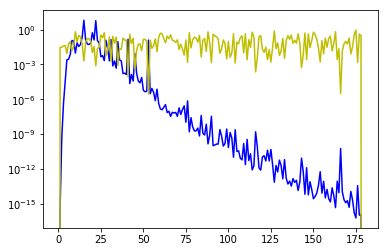

In [30]:
plt.semilogy(kkz/np.pi*Lz,BigPEkNew[40,:], 'b-') #note this may have empty space because we have made integers out of reals, above
plt.semilogy(kkz/np.pi*Lz,BigPEk[40,:], 'y-')
plt.show()

In [31]:
plt.semilogy(kkx/2./np.pi*Lx,BigPEkNew[:,80], 'b-') #note this may have empty space because we have made integers out of reals, above
plt.semilogy(kkx/2./np.pi*Lx,BigPEk[:,80], 'y-')
plt.show()

In [32]:
rhoNew = iFFT_FST(Nx,Nz,rhoHatNew) # Go back to physical space, and we should see some larger scale structure

[ -52.79207523  -74.03219966  -91.02683805 -100.41029882  -98.60678683
  -84.45429222  -59.61785179  -27.07573291    9.59320659   45.75168404
   76.36159467   98.12007103  109.93769639  110.98010521   99.62568215
   75.08589889   39.77626211   -0.4851359   -38.76798042  -69.06594432
  -86.7352743   -88.99094154  -76.3916208   -53.5432609   -27.58346572
   -5.60255446    7.37615481    9.78182124    4.34441507   -2.94144585
   -6.07351036   -1.97578988    9.02201266   24.11468821   38.76421422
   47.62309637   46.70093585   35.77323372   18.44358533   -0.50932815
  -17.84308767  -32.24825139  -42.79364335  -47.46342785  -43.49963171
  -29.59491069   -8.06175225   15.13728552   32.71219202   39.51456262
   35.21704407   24.26283993   12.81387563    5.15424159    2.57596637
    4.54722299    9.68909403   15.60236534   18.601411     14.73380767
    2.32413065  -16.15235384  -35.36157094  -50.50992155  -59.56981296
  -62.66651356  -59.88271947  -50.04018704  -31.42544336   -3.83406509
   29.

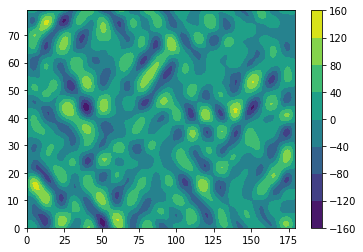

In [33]:
print(rhoNew[:,10].real)

plt.contourf(rhoNew.real) # Should look smoother
plt.colorbar()
plt.show()

Copmute the ke centroid

In [188]:
print('PeCentroid New is: ',PeCentroid(rhoHatNew, kkx, kkz))  # The centroid should be at a lower wave number.

0j 0j
PeCentroid New is:  15.373509584662138


In [189]:
#np.savetxt('RandomSample_080_180_5.txt',rhoNew.real)